## ${\color{pink}{Notes:}}$

-This file is submitted at 3.3.25 at 11:45.

-We decided to write another implementation of the discrete haar wavelet transform because there was one thing that we didn't add,

-we ran only one time across the siganl while we should have had an option to do it a couple of times, depending on what the user choose

-because the way the discrete haar wavelet transfrom should work is that it goes one time, then we take the first half and we go like this a couple of times(amount of levels we want) each level we work on half of the previous level.(first level we work on the full signal).

-this should be an improved discrete wavelet transform then the one we submitted first,

if possible we would like to include this file in out project as well even though this file is submitted late if it is ok.

------

# ${\color{purple}\mathbb{NAMES:}}$
1- ${\color{red}Yuval\ Kaver}$, id: 329

2- ${\color{red}Matan\ Ginzburg}$, id: 215

In [1]:
import numpy as np
import sympy as sy  #for integral...
import scipy            #for integral
import scipy.integrate
import matplotlib.pyplot as plt
import math

In [2]:
import pydub
from pydub import AudioSegment
from scipy.io.wavfile import write

audio_strange = r"\Users\matan\Documents\Visual Code thong\DIGITAL SIGNAL P(OTOT)\strangemusic (1).mp3"

In [3]:
sound_strange = AudioSegment.from_file(audio_strange)

In [4]:
def improved_haar_wavelet2(sigs,amount,threshold=0):
    n = len(sigs)
    odd = []
    first_last = []
    if n < 3:
        return np.array([]) #not doog enough
    if n%2==0:
        odd.append(sigs[n-1])
        sigs = sigs[:n-1]
    n = n-1
    first_last.append(sigs[0])      #keep the first and last
    first_last.append(sigs[n-1])

    sig_averages = np.zeros(n - 1)
    sig_diff = np.zeros(n - 1)

    while(amount>0 and n>2):

        for i in range(1,n-2):

            sig_averages[i] = (sigs[i + 1] + sigs[i - 1]) / 2.0     #i-1 cuz we want the first
            sig_diff[i] = sigs[i + 1] - sigs[i - 1]
        
            if abs(sig_diff[i]) < threshold:
               sig_diff[i] = 0.0
            else:
                sig_diff[i] = sig_diff[i]

        amount -= 1
        n = n//2


    return sig_averages,sig_diff    #c and d.

#----------------------------------------------------------------------------------------------------------
def improved_inverse_haar_wavelet2(sig_averages,sig_diff,amount): 
    n = len(sig_averages)

    sig_averages_new = np.zeros(n)
    sig_diff_new = np.zeros(n)

    if n == 0:
        return np.array([])
    reconstructed_sigs = np.zeros(n) 
    
    while(amount>0 and n>2):

        for i in range(1, n -2):
            sig_averages_new[i] = (sig_averages[i + 1] - sig_averages[i - 1]) * 2.0
            sig_diff_new[i] =  sig_diff[i + 1] + sig_diff[i - 1]
    


        for j in range(1,n//2):
            reconstructed_sigs[2*j] = sig_averages_new[j] +  sig_diff_new[j]
            reconstructed_sigs[2*j +1] =  sig_averages_new[j] - sig_diff_new[j]  

        amount -= 1


    reconstructed_sigs


    return reconstructed_sigs

In [5]:
#loading + normilizing
sound_strange = AudioSegment.from_file(audio_strange)
signal = np.array(sound_strange.get_array_of_samples(), dtype="float32")
signal_normlized = signal / np.max(np.abs(signal))

In [ ]:
threshold=0
amount = 4
signal_len = len(signal)
c_0,d_0, = improved_haar_wavelet2(signal_normlized,amount,threshold)

inverse_transformed_signal_0 = improved_inverse_haar_wavelet2(c_0,d_0,amount)


# Clip and Convert to int16 

int16_signal = np.clip(inverse_transformed_signal_0 * 32767, -32768, 32767).astype(np.int16)
write("haaaaaaar0.wav", 2*sound_strange.frame_rate, int16_signal)
#----------

threshold=0.01
amount = 4
signal_len = len(signal)
c_1,d_1 = improved_haar_wavelet2(signal_normlized,amount,threshold)

inverse_transformed_signal_1 = improved_inverse_haar_wavelet2(c_0,d_0,amount)


# Clip and Convert to int16 

int16_signal = np.clip(inverse_transformed_signal_1 * 32767, -32768, 32767).astype(np.int16)
write("haaaaaaar1.wav", 2*sound_strange.frame_rate, int16_signal)
#------------------------

threshold=0.5
amount = 4
signal_len = len(signal)
c_2,d_2, = improved_haar_wavelet2(signal_normlized,amount,threshold)

inverse_transformed_signal_2 = improved_inverse_haar_wavelet2(c_0,d_0,amount)

#inverse_transformed_ignal_streched_0 = inverse_transformed_signal_0 * np.max(np.abs(signal))

# Clip and Convert to int16 

int16_signal = np.clip(inverse_transformed_signal_2 * 32767, -32768, 32767).astype(np.int16)
write("haaaaaaar2.wav", 2*sound_strange.frame_rate, int16_signal)



# ${\color{pink}{MSE + RATIO:}}$

In [16]:
def calc_error_mse(original_sig,new_sig):

    sum = 0
    n= len(original_sig)
    for i in range(n-2):
        sum = sum + (original_sig[i] - new_sig[i] )**2
        
    sum = sum/n
    return sum

def compression_ratio(original_sig,new_sig):

    new_sig_nonzero = np.count_nonzero(new_sig)
  
    ration_new = new_sig_nonzero / len(new_sig)

    #print(len(new_sig),"new_sig\n",new_sig)
    #print(new_sig_nonzero,"nonzero\n",new_sig_nonzero)
    
    #original_sig_nonzero = np.nonzero(original_sig)
    #ration_original = len(original_sig_nonzero) / len(original_sig)

    return ration_new

In [17]:
mse_0 = calc_error_mse(signal_normlized,inverse_transformed_signal_0)   #
mse_0_01 = calc_error_mse(signal_normlized,inverse_transformed_signal_1)   #
mse_0_5 = calc_error_mse(signal_normlized,inverse_transformed_signal_2)   #

ratio0 = compression_ratio(signal_normlized,inverse_transformed_signal_0)
ratio1 = compression_ratio(signal_normlized,inverse_transformed_signal_1)
ratio2 = compression_ratio(signal_normlized,inverse_transformed_signal_2)


print("Threshold 0\nMSE:",mse_0,"\ncompression ratio:",ratio0)
print("Threshold 0.01\nMSE:",mse_0_01,"\ncompression ratio:",ratio1)
print("Threshold 0.5\nMSE:",mse_0_5,"\ncompression ratio:",ratio2)


Threshold 0
MSE: 0.010747886481451033 
compression ratio: 0.8304163711137357
Threshold 0.01
MSE: 0.010747886481451033 
compression ratio: 0.8304163711137357
Threshold 0.5
MSE: 0.010747886481451033 
compression ratio: 0.8304163711137357


# ${\color{pink}{Plotting:}}$

c:\Users\matan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


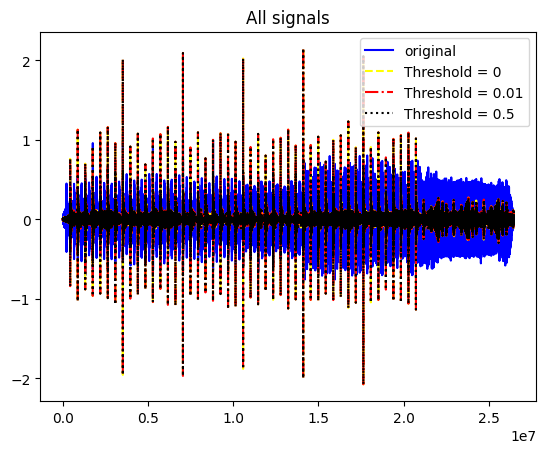

In [9]:

# Plot multiple graphs
plt.plot(signal_normlized,label='original', color='blue', linestyle='-')
plt.plot(inverse_transformed_signal_0,label='Threshold = 0', color='yellow', linestyle='--')
plt.plot(inverse_transformed_signal_1, label='Threshold = 0.01', color='red', linestyle='-.')
plt.plot(inverse_transformed_signal_2, label='Threshold = 0.5', color='black', linestyle=':')
plt.legend()
plt.title("All signals")
#plt.plot(x, detail_coefficients, label='cos(x)', color='red', linestyle='--')

plt.show()

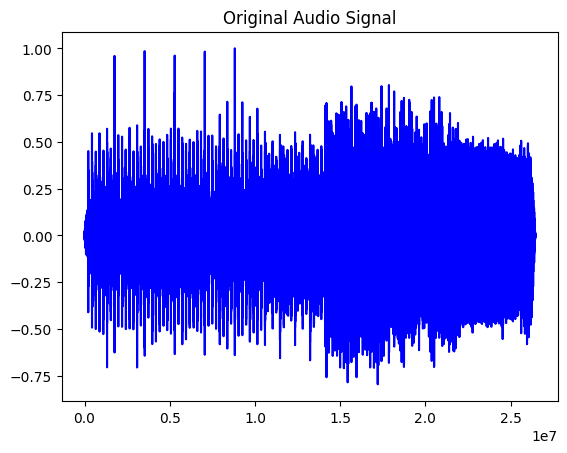

In [10]:
plt.plot(signal_normlized,label='original', color='blue', linestyle='-')
plt.title("Original Audio Signal")
plt.show()

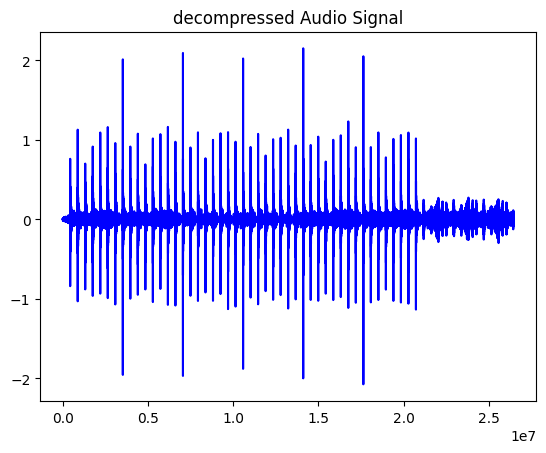

In [12]:
plt.plot(inverse_transformed_signal_0,label='original', color='blue', linestyle='-')
plt.title("decompressed Audio Signal")
plt.show()

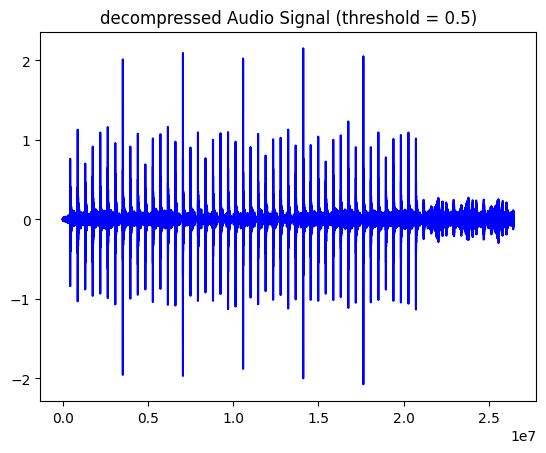

In [14]:
plt.plot(inverse_transformed_signal_2,label='original', color='blue', linestyle='-')
plt.title("decompressed Audio Signal (threshold = 0.5)")
plt.show()